#  Занятие 10
# Кластеризация

Метод K-средних. EM-алгоритм. Алгоритмы семейства FOREL. DBSCAN. Реализация в sklearn. Метрики кластеризации.


**Кластеризация (англ. cluster analysis)** — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

В силу частичного сходства в постановке задач с классификацией кластеризацию ещё называют **unsupervised classification**.

Кластеризация широко применяется в машинном обучении для решения различного спектра задач:

* классификация (определение к какому классу относится каждый объект или же выделение новых классов, которые не были известны заранее);

* сегментация рынка (разделение потенциальных клиентов на группы по их характеристикам для разработки более эффективных стратегий в маркетинге и продажах);

* сегментация изображений (разделение изображения на сегменты или группы пикселей);

* кластеризация геоданных (группировка данных по их географическому расположению, например, разделение районов на безопасные и опасные, богатые и бедные, и так далее);

* понижение размерности (уменьшение количества признаков путем объединения схожих в один кластер).

Типы кластеризаций можно классифицировать по следующим критериям:

1. По способу формирования кластеров:

* Разделительные (partitioning), которые разбивают данные на заданное число кластеров, минимизируя расстояние внутри кластера и максимизируя расстояние между кластерами (например, K-means);

* Основанные на плотности (density-based), которые группируют точки, которые находятся в областях с высокой плотностью и отделяют их от областей с низкой плотностью (например, DBSCAN).

* Основанные на сетке (grid-based) — разбивают пространство на ячейки сетки и анализируют плотность данных в каждой ячейке (например, STING).

* Основанные на модели (model-based) — предполагают, что данные порождены некоторой статистической моделью и пытаются подобрать параметры этой модели (например, смеси Гауссианов).

* Основанные на графах (graph-based) — используют графовое представление данных и разбивают его на подграфы, соответствующие кластерам (например, спектральная кластеризация).

* Основанные на подпространствах (subspace-based) — ищут кластеры в подпространствах признаков, а не во всём пространстве (например, CLIQUE).

* Основанные на ансамбле (ensemble-based) — комбинируют результаты различных алгоритмов кластеризации, чтобы получить более стабильное и надёжное разбиение (например, CSPA).

2. По степени вложенности кластеров:

* Плоские (flat) — разбивают данные на один уровень кластеров, не учитывая их иерархию (например, K-means).

* Иерархические (hierarchical) — разбивают данные на несколько уровней кластеров, учитывая их иерархию. Существуют два основных подхода к иерархической кластеризации: агломеративный (начинается с того, что каждый объект является отдельным кластером, а затем постепенно наиболее близкие кластеры объединяются в более крупные) и дивизивный (начинается с того, что все объекты составляют один кластер, а затем постепенно разделяются на более мелкие кластеры).

3. По степени пересечения кластеров:

* Исключающие (exclusive) — каждый объект принадлежит только одному кластеру (например, K-means).

* Перекрывающие (overlapping) — каждый объект может принадлежать нескольким кластерам (например, MCOKE).

* Нечёткие (fuzzy) — каждый объект принадлежит каждому кластеру с некоторой степенью принадлежности (например, fuzzy K-means).



Рассмотрим подробнее метод k-means. Существуют различные вариации алгоритма K-Means, которые модифицируют его шаги или функцию потерь для улучшения производительности, а также применимости к разным типам данных. К самым популярным вариациям относятся следующие:

* **Lloyd's algorithm** — это классический вариант K-Means, который хорошо работает для сферических кластеров с одинаковой плотностью, но может давать плохие результаты для других форм или размеров кластеров.

* **Elkan algorithm** — более быстрый вариант классического K-Means, который использует неравенство треугольника для уменьшения количества вычислений расстояний между объектами и центроидами, что может быть эффективнее на некоторых наборах данных с хорошо определёнными кластерами, однако требуется больше памяти из-за выделения дополнительного массива размера (n_samples, n_clusters).

* **Mini-batch K-Means** — модификация классического K-Means, использующая случайные подвыборки данных на каждой итерации для обучения. Хорошо подходит для больших датасетов.

* **K-Medoids** — вариант K-Means, который в качестве центроидов выбирает реальные точки (медоиды) из данных, а не их средние значения, что повышает устойчивость к выбросам.

* **K-Modes** — вариант алгоритма K-Means для работы с категориальными данными, который выбирает один из объектов в кластере в качестве моды и минимизирует сумму расстояний Хэмминга между модой и объектами в кластере. Расстояние Хэмминга представляет из себя количество позиций, в которых значения векторов не совпадают.

Одним из ключевых вопросов при использовании K-Means является выбор начальных центроидов, поскольку от них зависит качество и скорость сходимости алгоритма. Существует несколько способов инициализации центроидов:

* **Случайный выбор:** выбирается k случайных точек из данных в качестве начальных центроидов. Такой метод прост, но может привести к плохим результатам, если начальные центроиды слишком близки друг к другу или к краям распределения.

* **K-Means++:** первый центроид выбирается случайно, а затем выбираются остальные центроиды с вероятностью, пропорциональной квадрату расстояния до ближайшего уже выбранного центроида. Данный метод улучшает качество кластеризации, уменьшая вероятность попадания в локальный минимум, но требует дополнительных вычислений.

* **Greedy K-Means++** — модификация K-Means++, которая ускоряет сходимость и улучшает качество кластеризации за счёт того, что на каждом шаге при выборе центра кластера производится несколько попыток и выбирается лучший (тот, который минимизирует суммарное квадратичное отклонение точек от центров кластеров).

Алгоритм k-means состоит из следующих шагов:

1. Вычисляются центроиды кластеров.

2. Далее рассчитывается квадрат евклидова (или другого) расстояния от каждого наблюдения до центроидов.

3. На основе полученного расстояния наблюдениям присваиваются метки кластеров, которые к ним расположены ближе всего, а также рассчитывается инерция — мера того, насколько хорошо данные были разбиты на кластеры.

4. Шаги 2-3 повторяются до тех пор, пока инерция на текущей и предыдущей итерациях перестанет изменяться меньше установленного порога (пока положение центроидов перестанет изменяться в пространстве) или пока не будет достигнуто установленное количество итераций.

5. Наблюдения, расположенные ближе всего к полученным центроидам, и будут составлять кластеры.

Другим важным аспектом, влияющим на качество алгоритма, является подбор оптимального числа кластеров k, которое устанавливается заранее вручную. Существует несколько методов для выбора оптимального k:

* **Метод локтя**, основанный на графике суммы квадратов расстояний между объектами и центроидами кластеров (SSE) в зависимости от k. Оптимальным k считается та точка, после которой SSE уменьшается незначительно.

* **Метод силуэта**, основанный на графике среднего значения силуэта для каждого k. Силуэт — это мера того, насколько хорошо объект отнесён к своему кластеру по сравнению с другими кластерами. Оптимальным k считается та точка, где силуэт достигает максимума.

* **Метод комплексной оценки**, основанный на анализе нескольких критериев, таких как динамика перераспределения объектов в кластерах, изменение потенциальной энергии объектов внутри кластеров и характерные точки графиков этих критериев. Оптимальным k считается точка, которая удовлетворяет набору правил, использующих данные критерии.

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris


import warnings
warnings.filterwarnings('ignore')

In [2]:
class KMeansClustering:
    def __init__(self, n_clusters=8, max_iter=300, tol=0.0001, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def _greedy_kmeans_plus_plus(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        n_local_trials = 2 + int(np.log(self.n_clusters))

        indices = np.arange(n_samples)
        first_index = np.random.choice(indices)
        centers = np.zeros((self.n_clusters, n_features))

        centers[0] = X[first_index]
        first_center = centers[0].reshape(1, -1)
        sq_distances = cdist(X, first_center, metric='sqeuclidean').ravel()

        for i in range(1, self.n_clusters):
            min_cost = np.inf
            min_new_sq_distances = []
            best_candidate_index = None

            for _ in range(n_local_trials):
                candidates_probas = sq_distances / np.sum(sq_distances)
                candidate_index = np.random.choice(indices, p=candidates_probas)
                candidate = X[candidate_index].reshape(1, -1)

                new_sq_distances = cdist(X, candidate, metric='sqeuclidean').ravel()
                new_cost = np.sum(np.minimum(sq_distances, new_sq_distances))

                if new_cost < min_cost:
                    best_candidate_index = candidate_index
                    min_new_sq_distances = new_sq_distances
                    min_cost = new_cost

            centers[i] = X[best_candidate_index]   # Choose the new center
            sq_distances = np.minimum(sq_distances, min_new_sq_distances)

        return centers

    def fit(self, X):
        n_samples, n_features = X.shape
        self.inertia_ = np.inf
        self.cluster_centers_ = self._greedy_kmeans_plus_plus(X)

        # Lloyd's algorithm
        for _ in range(self.max_iter):
            distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
            labels = np.argmin(distances, axis=1)
            new_inertia = np.sum(np.min(distances, axis=1))
            new_centers = np.zeros((self.n_clusters, n_features))

            for k in range(self.n_clusters):
                new_centers[k] = np.mean(X[labels == k], axis=0)

            if np.abs(new_inertia - self.inertia_) < self.tol:
                break

            self.inertia_ = new_inertia
            self.cluster_centers_ = new_centers

    def predict(self, X):
        distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
        predicted_labels = np.argmin(distances, axis=1)

        return predicted_labels

In [3]:
X1, y1 = make_blobs(n_samples=250, n_features=2, centers=8, random_state=0)
print(y1)

[1 3 7 7 6 7 1 3 7 7 0 3 1 1 3 3 5 1 7 4 0 1 1 3 4 7 0 0 6 7 0 0 5 5 7 2 1
 1 6 5 4 7 1 2 1 1 4 3 6 4 7 3 0 2 2 1 7 2 4 0 0 0 1 4 6 5 0 4 6 6 4 4 1 4
 2 3 1 1 5 4 6 4 1 2 5 0 7 6 7 3 0 1 2 5 1 5 3 3 3 1 5 4 0 4 7 6 2 2 2 4 6
 2 5 1 6 4 0 6 5 0 0 6 3 5 1 6 0 2 5 5 6 3 3 1 5 4 5 0 2 2 3 0 4 7 5 4 2 0
 2 6 2 5 2 1 4 1 5 0 4 6 7 5 5 7 6 2 2 3 6 1 7 3 4 7 2 6 6 4 2 2 0 5 4 4 6
 3 1 7 6 7 7 0 4 5 7 2 6 6 2 5 3 3 2 7 1 7 6 6 4 3 5 7 6 3 5 0 3 3 5 5 2 0
 6 3 4 0 5 3 5 2 0 6 4 0 1 1 2 2 0 1 3 7 0 7 0 3 4 7 3 7]


In [4]:
kmeans = KMeansClustering(n_clusters=8, random_state=0)
kmeans.fit(X1)
kmeans_pred_res = kmeans.predict(X1)
kmeans_ari = adjusted_rand_score(y1, kmeans_pred_res)
kmeans_centroinds = kmeans.cluster_centers_
print(f'Adjusted Rand Score for KMeans: {kmeans_ari}', '', sep='\n')
print('centroids', kmeans_centroinds, '', sep='\n')
print('prediction', kmeans_pred_res, sep='\n')

Adjusted Rand Score for KMeans: 0.8082423809657193

centroids
[[ 9.20217726 -2.23709633]
 [-1.5438023   7.64224793]
 [-8.61527648 -8.32916569]
 [ 0.81231976  4.02302811]
 [-1.81106448  2.87987747]
 [ 2.3666746   1.30457024]
 [ 1.47433518  8.49698324]
 [ 5.86512606  0.19818122]]

prediction
[5 1 2 2 6 2 5 1 2 2 5 1 5 5 1 1 5 5 2 0 3 7 3 1 0 2 3 3 6 2 1 3 7 7 2 4 5
 5 6 7 0 2 5 4 5 5 0 1 6 7 2 1 3 3 4 5 2 4 0 3 3 3 5 0 6 7 3 0 6 6 0 0 5 0
 3 1 5 5 7 0 3 0 5 4 7 3 2 6 2 6 3 5 4 5 5 7 1 1 1 3 7 0 3 0 2 6 3 4 4 0 6
 4 7 5 1 0 3 6 7 3 3 6 1 7 5 6 3 4 7 7 6 1 1 5 7 0 7 3 4 4 1 3 0 2 7 0 4 3
 4 6 4 7 4 5 0 5 7 3 0 6 2 7 5 2 6 4 3 3 6 5 2 1 0 2 4 6 6 0 4 4 3 7 0 0 6
 1 5 2 6 2 2 3 0 7 2 4 6 6 4 7 1 1 4 2 5 2 6 1 0 1 5 2 6 6 7 3 1 1 7 7 4 3
 6 1 0 3 7 1 7 4 4 6 0 3 5 5 4 4 3 3 1 2 3 2 3 1 0 2 1 2]


In [5]:
sk_kmeans = KMeans(n_clusters=8, random_state=0)
sk_kmeans.fit(X1)
sk_kmeans_pred_res = sk_kmeans.predict(X1)
sk_kmeans_ari = adjusted_rand_score(y1, sk_kmeans_pred_res)
sk_kmeans_centroinds = sk_kmeans.cluster_centers_
print(f'Adjusted Rand Score for sk KMeans: {sk_kmeans_ari}', '', sep='\n')
print(sk_kmeans_centroinds, '', sep='\n')
print('prediction', sk_kmeans_pred_res, sep='\n')

Adjusted Rand Score for sk KMeans: 0.8222406681732166

[[-8.61527648 -8.32916569]
 [-1.52747726  2.92117212]
 [ 9.20217726 -2.23709633]
 [ 0.94522625  4.27919655]
 [ 1.47433518  8.49698324]
 [ 2.18881578  1.47866573]
 [-1.5438023   7.64224793]
 [ 5.68383116  0.22802058]]

prediction
[5 6 0 0 4 0 5 6 0 0 5 6 5 5 6 6 7 5 0 2 3 7 5 6 2 0 1 3 4 0 6 3 7 7 0 1 5
 5 4 7 2 0 5 1 5 5 2 6 4 7 0 6 3 3 1 5 0 1 2 3 3 1 5 2 4 7 3 2 4 4 2 2 5 2
 1 6 5 5 7 2 3 2 5 1 7 3 0 4 0 4 1 5 1 5 5 7 6 6 6 3 7 2 3 2 0 4 1 1 1 2 4
 1 7 5 6 2 3 4 7 3 1 4 6 7 5 4 3 1 7 7 4 6 6 5 7 2 7 3 1 1 6 3 2 0 7 2 1 3
 1 4 1 7 1 5 2 5 7 3 2 4 0 7 7 0 4 1 3 3 4 5 0 6 2 0 1 4 4 2 1 1 3 7 2 2 4
 6 5 0 4 0 0 5 2 7 0 1 4 4 1 7 6 6 1 0 5 0 4 6 2 6 7 0 4 4 7 3 6 6 7 7 1 3
 4 6 2 3 7 6 7 1 1 4 2 3 5 5 1 1 3 3 6 0 3 0 3 6 2 0 6 0]


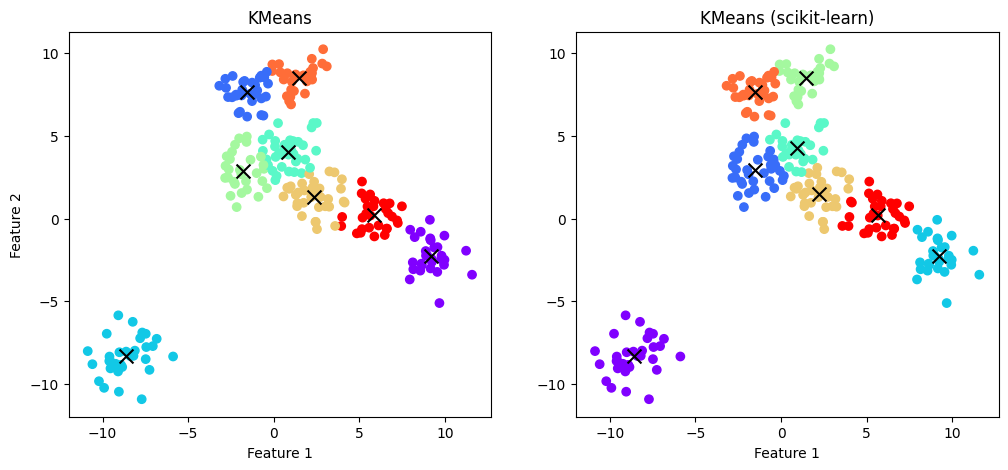

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans_pred_res, cmap="rainbow")
plt.scatter(kmeans_centroinds[:, 0], kmeans_centroinds[:, 1], marker="x", color="black", s=100)
plt.title("KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X1[:, 0], X1[:, 1], c=sk_kmeans_pred_res, cmap="rainbow")
plt.scatter(sk_kmeans_centroinds[:, 0], sk_kmeans_centroinds[:, 1], marker="x", color="black", s=100)
plt.title("KMeans (scikit-learn)")
plt.xlabel("Feature 1")

plt.show()

## Иерархическая кластеризация

**Иерархическая кластеризация (также графовые алгоритмы кластеризации и иерархический кластерный анализ)** — совокупность алгоритмов упорядочивания данных, направленных на создание иерархии (дерева) вложенных кластеров. Выделяют два класса методов иерархической кластеризации:

* **Агломеративные методы (англ. agglomerative):** новые кластеры создаются путем объединения более мелких кластеров и, таким образом, дерево создается от листьев к стволу;

* **Дивизивные или дивизионные методы (англ. divisive):** новые кластеры создаются путем деления более крупных кластеров на более мелкие и, таким образом, дерево создается от ствола к листьям.

Алгоритмы иерархической кластеризации предполагают, что анализируемое множество объектов характеризуется определённой степенью связности. По количеству признаков иногда выделяют монотетические и политетические методы классификации. Как и большинство визуальных способов представления зависимостей графы быстро теряют наглядность при увеличении числа кластеров.

![image.png](attachment:image.png)

Параметры алгоритма можно посмотреть в документации: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

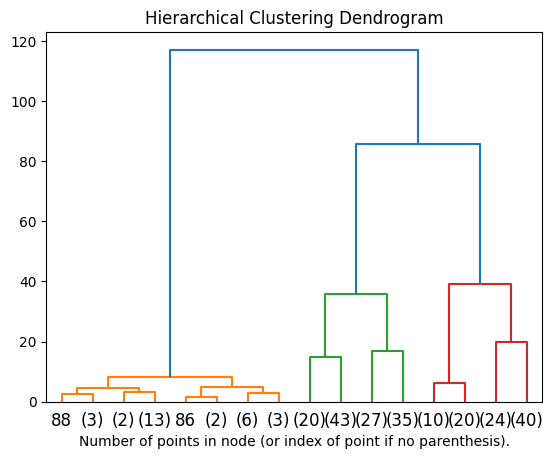

In [7]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X1)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## DBSCAN

**Основанная на плотности пространственная кластеризация для приложений с шумами (англ. Density-based spatial clustering of applications with noise, DBSCAN)** — это алгоритм кластеризации данных, который предложили Маритин Эстер, Ганс-Петер Кригель, Ёрг Сандер и Сяовэй Су в 1996. Это алгоритм кластеризации, основанной на плотности — если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены (точки со многими близкими соседями), помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко).

Рассмотрим набор точек в некотором пространстве, требующий кластеризации. Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

* Точка p является основной точкой, если по меньшей мере minPts точек находятся на расстоянии, не превосходящем
$\epsilon$ является максимальным радиусом соседства от p), до неё (включая саму точку p). Говорят, что эти точки достижимы прямо из p.

* Точка q прямо достижима из p, если точка q находится на расстоянии, не большем $\epsilon$, от точки p и p должна быть основной точкой.

* Точка q достижима из p, если имеется путь  достижима прямо из $p_1, .. , p_n$ и $p_n = q$, где каждая $p_{i+1}$ точка достижима прямо из $q$ (все точки на пути должны быть основными, за исключением $q$).

* Все точки, не достижимые из основных точек, считаются выбросами.

Достижимость не является симметричным отношением, поскольку, по определению, никакая точка не может быть достигнута из неосновной точки, независимо от расстояния (так что неосновная точка может быть достижимой, но ничто не может быть достигнуто из неё). Поэтому дальнейшее понятие связности необходимо для формального определения области кластеров, найденных алгоритмом DBSCAN. Две точки p и q связаны по плотности, если имеется точка o, такая что и p, и q достижимы из o. Связность по плотности является симметричной.

Тогда кластер удовлетворяет двум свойствам:

* Все точки в кластере попарно связны по плотности.

* Если точка достижима по плотности из какой-то точки кластера, она также принадлежит кластеру.


![image-2.png](attachment:image-2.png)

Теперь, если p является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимые из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.

В идеальном случае DBSCAN может достичь сложности $O(N)$, но не стоит особо на это рассчитывать. Если не пересчитывать каждый раз $E(x)$ точек, то ожидаемая сложность — $O(N\log{N})$.

Параметры алгоритма можно посмотреть в документации: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [8]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X1)
clustering.labels_

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1])

## Практические задания

1. Используя датасет по ирисам из sklearn выполните кластеризацию ирисов с помощью методов k-means, иерархической кластеризации, DBSCAN и не менее 2 других алгоритмов кластеризации из sklearn. Сравните полученные результаты и рассчитайте метрики качества кластеризации для каждого из рассмотренных методов.

In [9]:
iris = load_iris()
X = iris.data
y = iris.target

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
class KMeansClustering:
    def __init__(self, n_clusters=8, max_iter=300, tol=0.0001, random_state=0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def _greedy_kmeans_plus_plus(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        n_local_trials = 2 + int(np.log(self.n_clusters))

        indices = np.arange(n_samples)
        first_index = np.random.choice(indices)
        centers = np.zeros((self.n_clusters, n_features))

        centers[0] = X[first_index]
        first_center = centers[0].reshape(1, -1)
        sq_distances = cdist(X, first_center, metric='sqeuclidean').ravel()

        for i in range(1, self.n_clusters):
            min_cost = np.inf
            min_new_sq_distances = []
            best_candidate_index = None

            for _ in range(n_local_trials):
                candidates_probas = sq_distances / np.sum(sq_distances)
                candidate_index = np.random.choice(indices, p=candidates_probas)
                candidate = X[candidate_index].reshape(1, -1)

                new_sq_distances = cdist(X, candidate, metric='sqeuclidean').ravel()
                new_cost = np.sum(np.minimum(sq_distances, new_sq_distances))

                if new_cost < min_cost:
                    best_candidate_index = candidate_index
                    min_new_sq_distances = new_sq_distances
                    min_cost = new_cost

            centers[i] = X[best_candidate_index]   # Choose the new center
            sq_distances = np.minimum(sq_distances, min_new_sq_distances)

        return centers

    def fit(self, X):
        n_samples, n_features = X.shape
        self.inertia_ = np.inf
        self.cluster_centers_ = self._greedy_kmeans_plus_plus(X)

        # Lloyd's algorithm
        for _ in range(self.max_iter):
            distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
            labels = np.argmin(distances, axis=1)
            new_inertia = np.sum(np.min(distances, axis=1))
            new_centers = np.zeros((self.n_clusters, n_features))

            for k in range(self.n_clusters):
                new_centers[k] = np.mean(X[labels == k], axis=0)

            if np.abs(new_inertia - self.inertia_) < self.tol:
                break

            self.inertia_ = new_inertia
            self.cluster_centers_ = new_centers

    def predict(self, X):
        distances = cdist(X, self.cluster_centers_, metric='sqeuclidean')
        predicted_labels = np.argmin(distances, axis=1)

        return predicted_labels

In [13]:
kmeans = KMeansClustering(n_clusters=8, random_state=0)
kmeans.fit(X)
kmeans_pred_res = kmeans.predict(X)
kmeans_ari = adjusted_rand_score(y, kmeans_pred_res)
kmeans_centroinds = kmeans.cluster_centers_
print(f'Adjusted Rand Score for KMeans: {kmeans_ari}', '', sep='\n')
print('centroids', kmeans_centroinds, '', sep='\n')
print('prediction', kmeans_pred_res, sep='\n')

Adjusted Rand Score for KMeans: 0.4432389008643107

centroids
[[4.809375   3.228125   1.434375   0.228125  ]
 [6.44285714 2.94285714 5.40714286 1.95714286]
 [5.48333333 2.59166667 3.90416667 1.2       ]
 [7.625      3.0875     6.475      2.075     ]
 [5.35555556 3.78333333 1.51111111 0.27777778]
 [5.97647059 2.75882353 4.94705882 1.79411765]
 [6.81333333 3.18666667 5.72       2.21333333]
 [6.34545455 2.92727273 4.52272727 1.41363636]]

prediction
[0 0 0 0 0 4 0 0 0 0 4 0 0 0 4 4 4 4 4 4 4 4 0 0 0 0 0 4 0 0 0 4 4 4 0 0 4
 0 0 0 0 0 0 0 4 0 4 0 4 0 7 7 7 2 7 7 7 2 7 2 2 7 2 7 2 7 5 2 7 2 5 7 5 7
 7 7 7 1 7 2 2 2 2 5 2 7 7 7 2 2 2 7 2 2 2 2 2 7 2 2 6 5 6 1 6 3 2 3 1 6 1
 1 6 5 5 1 1 3 3 5 6 5 3 5 6 6 5 5 1 6 3 3 1 5 1 3 6 1 5 6 6 6 5 6 6 1 5 1
 1 5]


In [15]:
sk_kmeans = KMeans(n_clusters=8, random_state=0)
sk_kmeans.fit(X)
sk_kmeans_pred_res = sk_kmeans.predict(X)
sk_kmeans_ari = adjusted_rand_score(y, sk_kmeans_pred_res)
sk_kmeans_centroinds = sk_kmeans.cluster_centers_
print(f'Adjusted Rand Score for sk KMeans: {sk_kmeans_ari}', '', sep='\n')
print(sk_kmeans_centroinds, '', sep='\n')
print('prediction', sk_kmeans_pred_res, sep='\n')

Adjusted Rand Score for sk KMeans: 0.4495903964961917

[[5.         2.3        3.275      1.025     ]
 [7.475      3.125      6.3        2.05      ]
 [4.70454545 3.12272727 1.41363636 0.2       ]
 [6.44210526 2.97894737 4.59473684 1.43157895]
 [6.03684211 2.70526316 5.         1.77894737]
 [5.24285714 3.66785714 1.5        0.28214286]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.62083333 2.69166667 4.075      1.2625    ]]

prediction
[5 2 2 2 5 5 2 5 2 2 5 2 2 2 5 5 5 5 5 5 5 5 2 5 2 2 5 5 5 2 2 5 5 5 2 2 5
 5 2 5 5 2 2 5 5 2 5 2 5 2 3 3 3 7 3 7 3 0 3 7 0 7 7 3 7 3 7 7 4 7 4 7 4 3
 3 3 3 3 3 7 7 7 7 4 7 3 3 3 7 7 7 3 7 0 7 7 7 3 0 7 6 4 1 6 6 1 7 1 6 1 6
 4 6 4 4 6 6 1 1 4 6 4 1 4 6 1 4 4 6 1 1 1 6 4 4 1 6 6 4 6 6 6 4 6 6 6 4 6
 6 4]


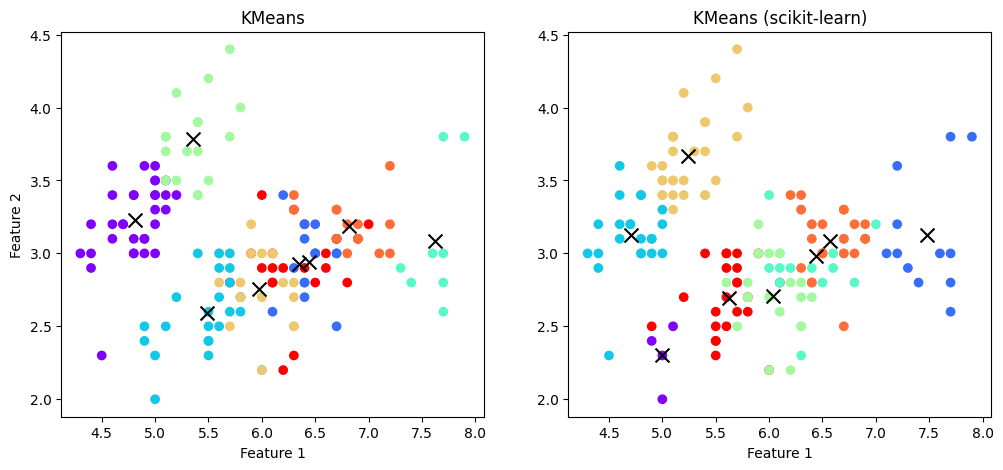

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_pred_res, cmap="rainbow")
plt.scatter(kmeans_centroinds[:, 0], kmeans_centroinds[:, 1], marker="x", color="black", s=100)
plt.title("KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X[:, 0], X[:, 1], c=sk_kmeans_pred_res, cmap="rainbow")
plt.scatter(sk_kmeans_centroinds[:, 0], sk_kmeans_centroinds[:, 1], marker="x", color="black", s=100)
plt.title("KMeans (scikit-learn)")
plt.xlabel("Feature 1")

plt.show()

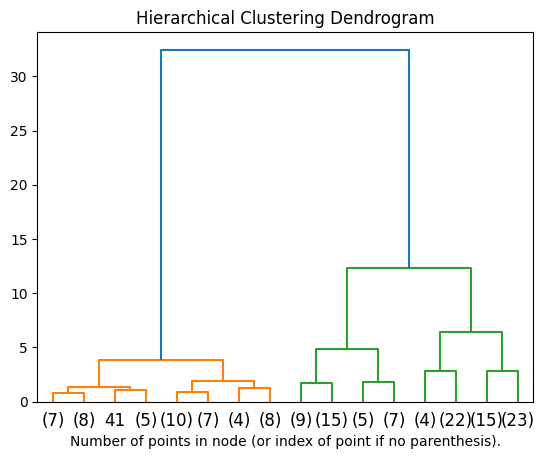

In [18]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [19]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
from sklearn import metrics

def model_evaluation(model, test_x, y_test, model_name):
    y_pred = model.predict(test_x)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    # precision = metrics.precision_score(y_test, y_pred)
    # recall = metrics.recall_score(y_test, y_pred)
    # f1 = metrics.f1_score(y_test, y_pred)
    R2_Score = metrics.r2_score(y_test, y_pred)

    # return pd.DataFrame([accuracy, precision, recall, f1, R2_Score], index=['accuracy', 'precision', 'recall', 'f1-score', 'R2_Score'], columns=[model_name])
    return pd.DataFrame([accuracy, R2_Score], index=['accuracy', 'R2_Score'], columns=[model_name])

model_evaluation(kmeans, X, y, 'kmeans')

,kmeans
accuracy,0.226667
R2_Score,-14.450000


In [27]:
from sklearn import metrics

def model_evaluation(model, test_x, y_test, model_name):
    y_pred = model.predict(test_x)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    # precision = metrics.precision_score(y_test, y_pred)
    # recall = metrics.recall_score(y_test, y_pred)
    # f1 = metrics.f1_score(y_test, y_pred)
    R2_Score = metrics.r2_score(y_test, y_pred)

    # return pd.DataFrame([accuracy, precision, recall, f1, R2_Score], index=['accuracy', 'precision', 'recall', 'f1-score', 'R2_Score'], columns=[model_name])
    return pd.DataFrame([accuracy, R2_Score], index=['accuracy', 'R2_Score'], columns=[model_name])

model_evaluation(sk_kmeans, X, y, 'sk_kmeans')

,sk_kmeans
accuracy,0.00
R2_Score,-20.81


In [28]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y, clustering.labels_)
# precision = metrics.precision_score(y_test, y_pred)
# recall = metrics.recall_score(y_test, y_pred)
# f1 = metrics.f1_score(y_test, y_pred)
R2_Score = metrics.r2_score(y, clustering.labels_)

# return pd.DataFrame([accuracy, precision, recall, f1, R2_Score], index=['accuracy', 'precision', 'recall', 'f1-score', 'R2_Score'], columns=[model_name])
pd.DataFrame([accuracy, R2_Score], index=['accuracy', 'R2_Score'], columns=['Hierachy'])


,Hierachy
accuracy,0.333333
R2_Score,-1.500000


2. Для метода k-means найдите оптимальное число кластеров для датасета ирисы. Совпадает ли это значение с числом классов в датасете?

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Text(0, 0.5, 'WCSS')

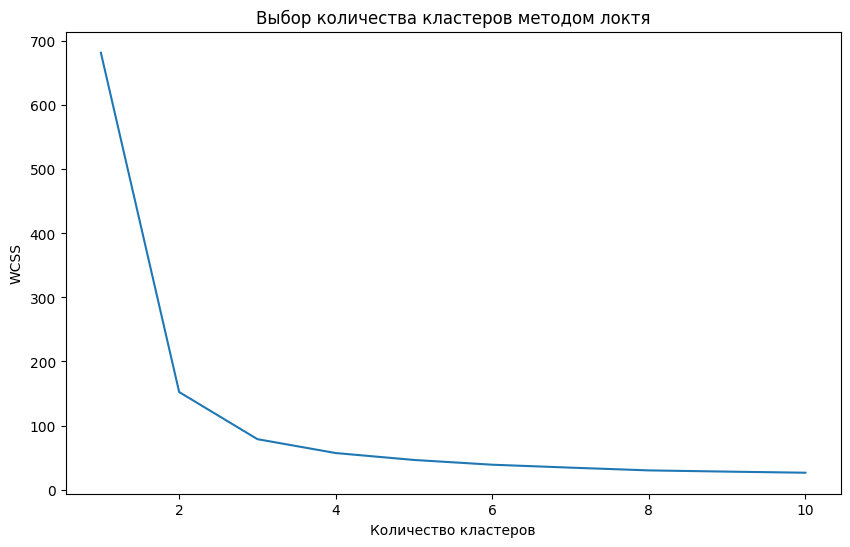

In [30]:
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []

# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):

    # настроим параметры модели (подробнее об этом расскажу чуть дальше)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

In [31]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

In [43]:
y_pred = kmeans1.fit_predict(X)

In [44]:
d = {'Target' : iris.target, 'Prediction' : y_pred}

# превратим словарь в датафрейм с соответствующими названиями столбцов
df = pd.DataFrame(d, columns = ['Target', 'Prediction'])

In [45]:
comparison = np.where(df['Target'] == df['Prediction'], True, False)
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[False False False False False]


In [46]:
df['Comparison'] = comparison
df.head()

,Target,Prediction,Comparison
0,0,1,False
1,0,1,False
2,0,1,False
3,0,1,False
4,0,1,False


In [47]:
y_pred = kmeans1.fit_predict(X)
accuracy = metrics.accuracy_score(y, y_pred)
R2_Score = metrics.r2_score(y, y_pred)

pd.DataFrame([accuracy, R2_Score], index=['accuracy', 'R2_Score'], columns=['kmeans1'])

,kmeans1
accuracy,0.24
R2_Score,-0.56


In [55]:
iris_df = pd.DataFrame(X)
iris_df['type'] = y

In [56]:
iris_df.head()

,0,1,2,3,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


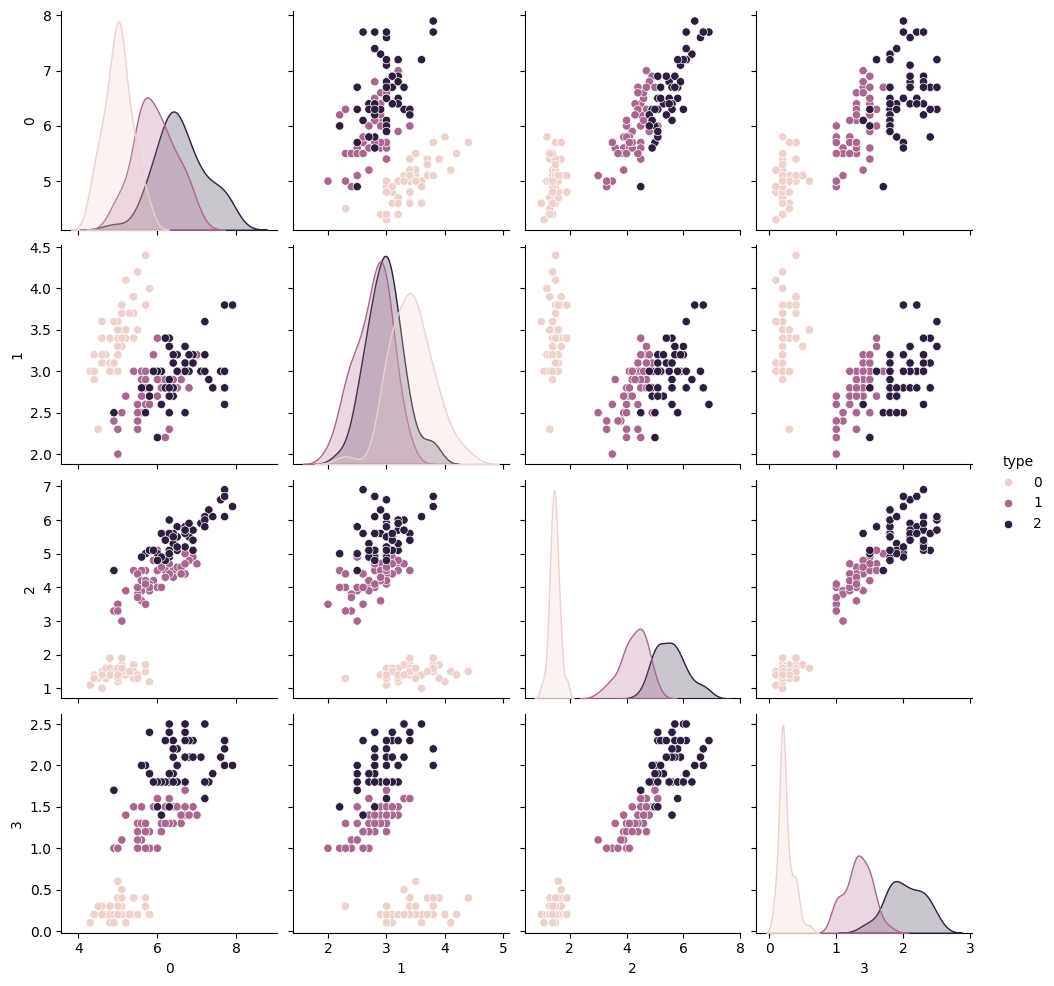

In [57]:
sns.pairplot(iris_df, hue='type')

3. Проанализируйте как влияют гиперпараметры (eps, min_samples, metric, algorithm, см. документацию) DBSCAN на кластеризацию (на примере датасета ирисов).

In [58]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

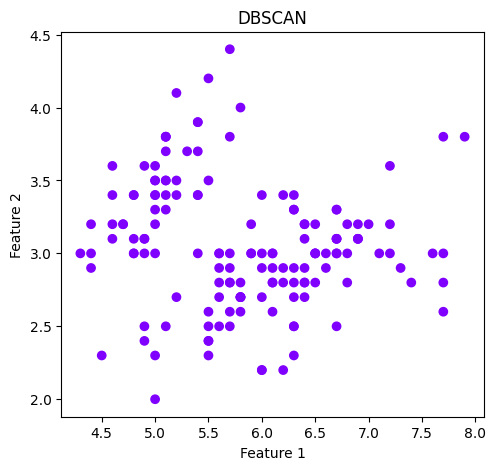

In [60]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="rainbow")
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

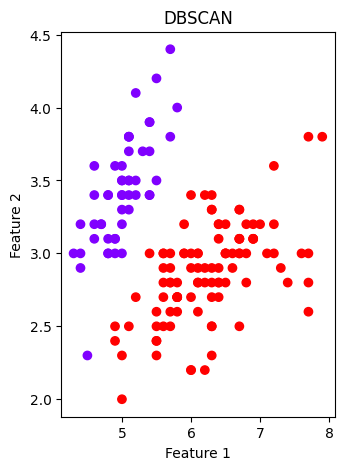

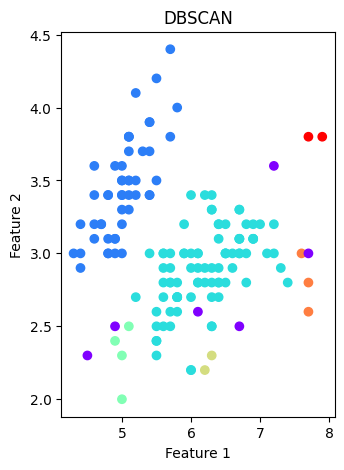

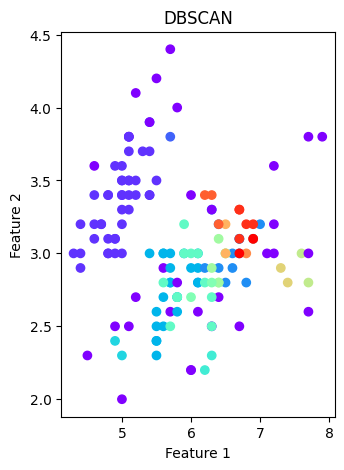

In [70]:
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []

# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 4):
    clustering = DBSCAN(eps=1/i, min_samples=2).fit(X)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, i)
    plt.subplots_adjust(wspace=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="rainbow")
    plt.title("DBSCAN")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.show()

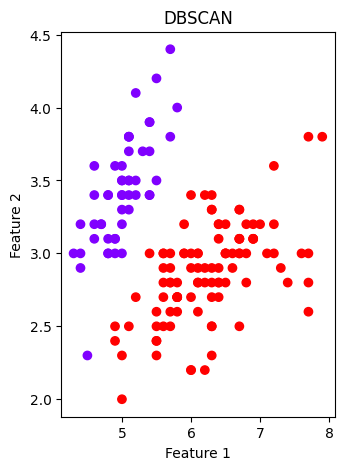

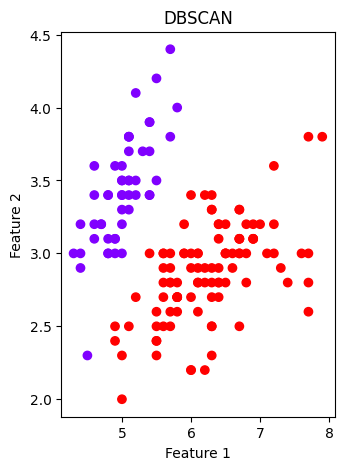

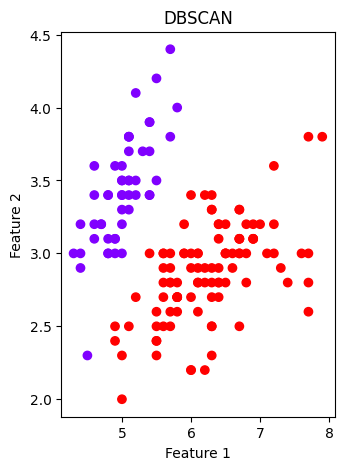

In [71]:

for i in range(1, 4):
    clustering = DBSCAN(eps=1, min_samples=i).fit(X)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, i)
    plt.subplots_adjust(wspace=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="rainbow")
    plt.title("DBSCAN")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.show()

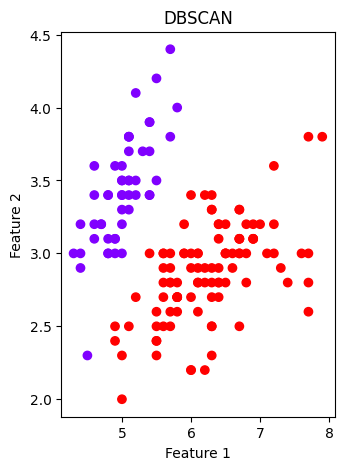

In [73]:
clustering = DBSCAN(eps=1, metric='euclidean').fit(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, i)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="rainbow")
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

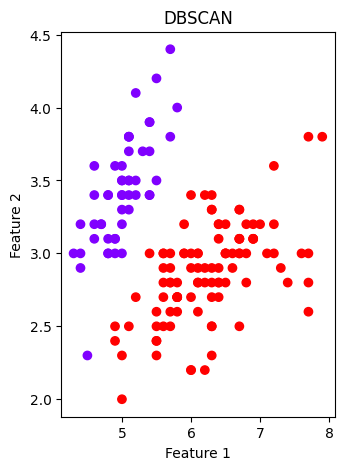

In [74]:

clustering = DBSCAN(eps=1, algorithm='ball_tree').fit(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, i)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="rainbow")
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

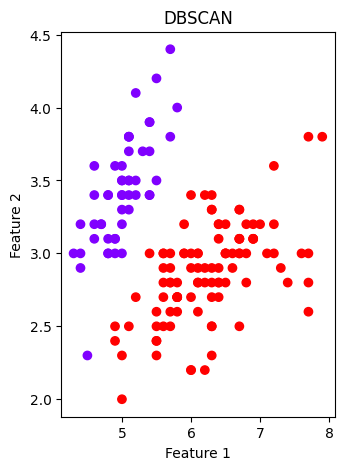

In [75]:

clustering = DBSCAN(eps=1, algorithm='kd_tree').fit(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, i)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="rainbow")
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

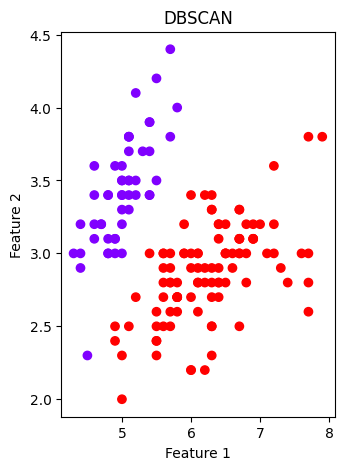

In [76]:


clustering = DBSCAN(eps=1, algorithm='brute').fit(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, i)
plt.subplots_adjust(wspace=0.2)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap="rainbow")
plt.title("DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()